In [162]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'   #to print multiple outputs 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for splitting
from sklearn.model_selection import train_test_split


#for normality check
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#for correlation analysis
import seaborn as sns



## Importing data 

In [144]:
df=pd.read_csv("03_realestate_dataset.csv",delimiter=";",decimal=",",index_col="No")
df.drop(["X1 transaction date"],axis=1,inplace=True)
df.shape
df.head(5)
df.dtypes

(414, 6)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9
2,19.5,306.59470,9,24.98034,121.53951,42.2
3,13.3,561.98450,5,24.98746,121.54391,47.3
4,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,390.56840,5,24.97937,121.54245,43.1


X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

## A Brief Overview of Data and Pre-Processing

In [145]:
df.rename(columns={"X2 house age":"house_age",
                  "X3 distance to the nearest MRT station":"distance_MRT",
                  "X4 number of convenience stores":"num_stores",
                  "X5 latitude":"latitude",
                   "X6 longitude":"longitude",

                  "Y house price of unit area":"Price"},inplace=True)
                  

df.describe()

,house_age,distance_MRT,num_stores,latitude,longitude,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [92]:
# correlation analysis between explanatory variables and target: price variable
df.corr()

,house_age,distance_MRT,num_stores,latitude,longitude,Price
house_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_MRT,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
num_stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

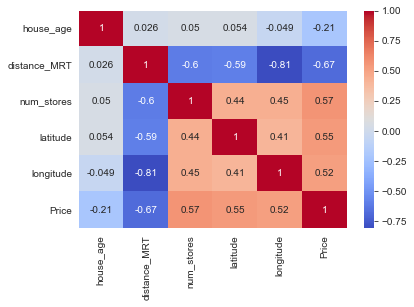

In [93]:

#abs(df.corr()["Price"] )  

#df['distance_center'].corr(df['latitude']) 
#df['distance_center'].corr(df['longitude'])

corr=df.corr()
sns.heatmap(corr,vmax=1,annot=True,cmap="coolwarm")# the significant correlation with distance, # stores , latitude and longitude
 # also a significant correlation btw distance and longitude


/Users/Apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

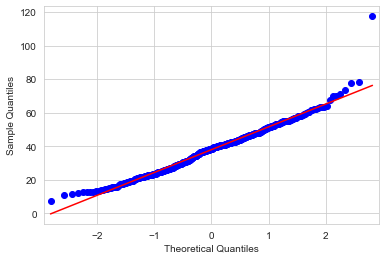

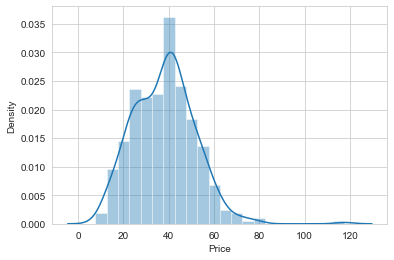

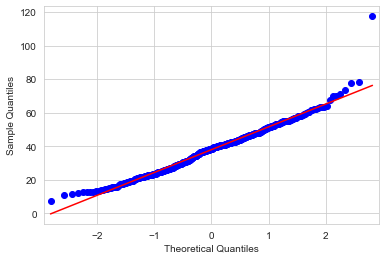

In [123]:
sns.distplot(df['Price']) # from histogram it seems that most of the house prices is distributed around mean value

# q-q plot
qqplot(df["Price"], line='s')
pyplot.show()


#sns.distplot(df['longitude']) # from histogram it seems that most of the house prices is distributed around mean value

# q-q plot
#qqplot(df["longitude"], line='s')
#pyplot.show()







### Explanatory variables vs Target Variable

Text(0.5, 0, 'House age')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Distance to MRT')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Number of stores')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'House price')

Text(0.5, 1.0, 'Real Estate Valuation')

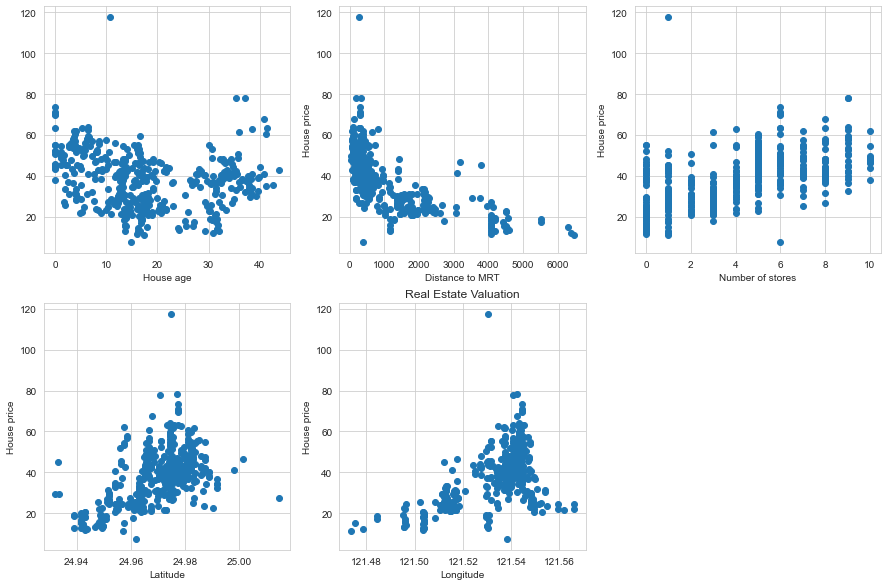

In [124]:
# visualization of relationship btw target variable and indep. variables
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(231)
ax2=fig.add_subplot(232)
ax3=fig.add_subplot(233)
ax4=fig.add_subplot(234)
ax5=fig.add_subplot(235)



ax1.scatter(x=df['house_age'], y=df['Price'])
ax2.scatter(x=df['distance_MRT'], y=df['Price'])
ax3.scatter(x=df['num_stores'], y=df['Price'])
ax4.scatter(x=df['latitude'], y=df['Price'])
ax5.scatter(x=df['longitude'], y=df['Price'])




ax1.set_xlabel('House age')
ax2.set_ylabel('House price')

ax2.set_xlabel('Distance to MRT')
ax2.set_ylabel('House price')

ax3.set_xlabel('Number of stores')
ax3.set_ylabel('House price')

ax4.set_xlabel('Latitude')
ax4.set_ylabel('House price')

ax5.set_xlabel('Longitude')
ax5.set_ylabel('House price')
plt.title('Real Estate Valuation')
plt.show()

### Visualization of the Variables

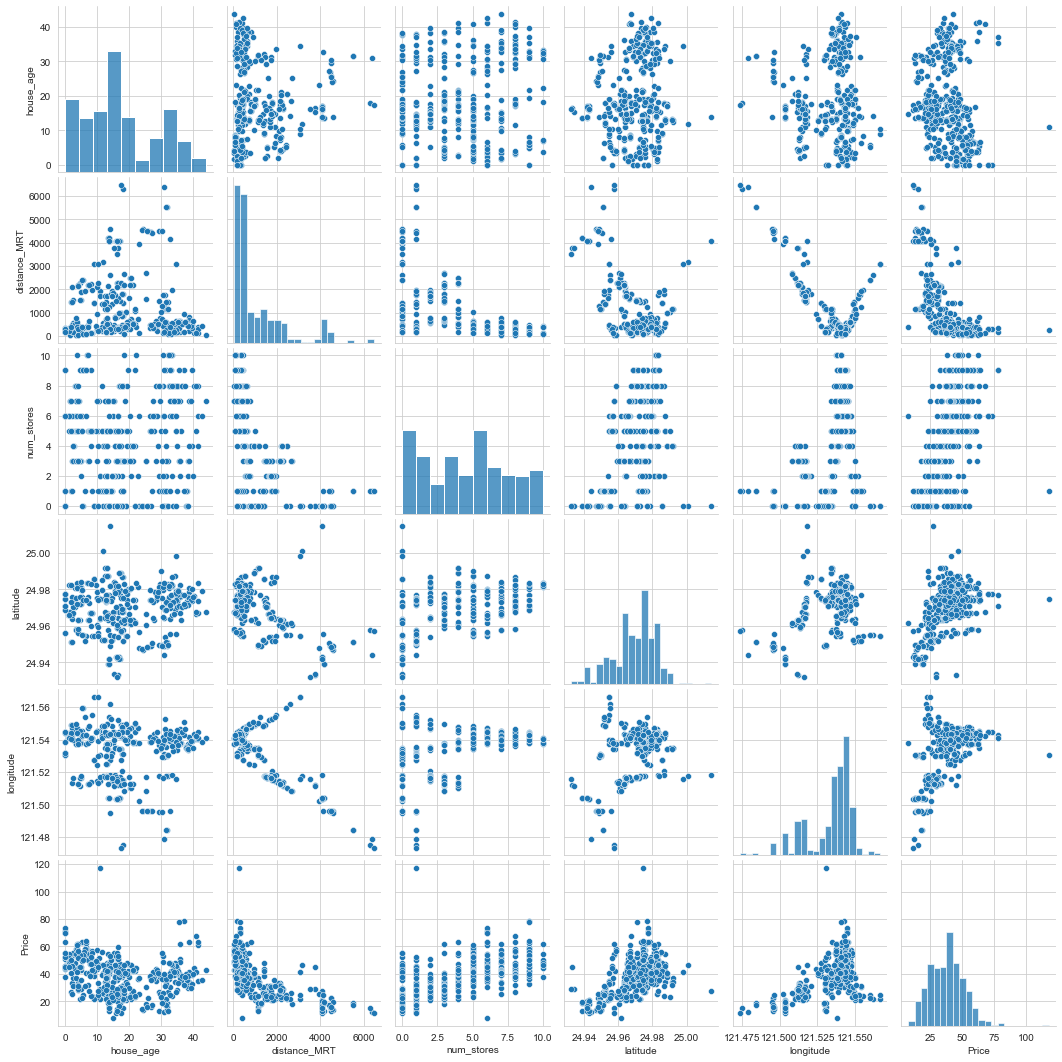

In [96]:
sns.set_style("whitegrid")   #optional plot
#plt.style.use("fivethirtyeight")
sns.pairplot(df)

Text(0.5, 0, 'Latitude in degree')

Text(0, 0.5, 'Longitude in degree')

Text(0.5, 1.0, 'House price vs Coordinates')

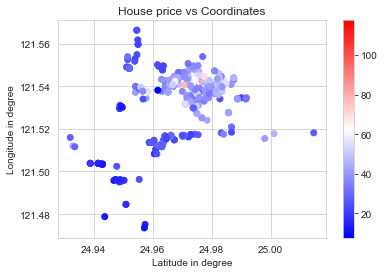

In [97]:
# relationship between coordinates(longitude and latitude) and house price

plt.scatter(x=df['latitude'], y=df['longitude'],c=df['Price'],cmap="bwr")
plt.colorbar()
plt.xlabel('Latitude in degree')
plt.ylabel('Longitude in degree')
plt.title("House price vs Coordinates")




## 1. Implementation of Regression Tree Algorithm

In [146]:
# definition of leaf nodes and decision nodes : feature index, threshold, left, right and variance reduction variables are only for
# decision nodes. value variable is for leaf nodes. 

class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        self.feature_index=feature_index
        self.threshold=threshold
        self.left=left
        self.right=right
        self.var_red=var_red
        self.value=value

In [147]:
class RegressionTree():
    def __init__(self,min_samples_split=2,max_depth=2):  # for the stopping criteria to avoid overfitting problem
        self.root=None 
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
    
#define the tree building method

    def build_tree(self,dataset,curr_depth=0):
        X,Y = dataset[:,:-1], dataset[:,-1]  #seperate the variables from the target variable
        num_samples,num_features=np.shape(X)
        best_split={}
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split=self.get_best_split(dataset,num_samples,num_features)
            if best_split["var_red"]>0: 
                left_subtree=self.build_tree(best_split["dataset_left"],curr_depth+1)
                right_subtree=self.build_tree(best_split["dataset_right"],curr_depth+1)
                
                #create the decision node
                return Node(best_split["feature_index"],best_split["threshold"], left_subtree,right_subtree,best_split["var_red"])

        
        leaf_value=self.calculate_leaf_value(Y) #  we use the calculate_leaf_value function to calculate leaf node value
        return Node(value=leaf_value)   
    
    
    
    def variance_reduction(self,parent,l_child,r_child):
        weight_l=len(l_child)/len(parent) # is used for scaling
        weight_r=len(r_child)/len(parent)
        reduction=np.var(parent) - (weight_l*np.var(l_child) + weight_r*np.var(r_child))  
        return reduction
    
    def calculate_leaf_value(self,Y):
        val=np.mean(Y)
        return val
    
    def split(self, dataset,feature_index, threshold):
        dataset_left= np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right= np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    

    def get_best_split(self,dataset,num_samples,num_features):
        best_split={} 
        max_var_red=-float("inf")
        
        for feature_index in range(num_features): #loop through all features and all possible threshold values for that feature
            feature_values=dataset[:,feature_index]
            possible_thresholds=np.unique(feature_values)  
            
            for threshold in possible_thresholds:
                dataset_left, dataset_right=self.split(dataset, feature_index,threshold)
                if len(dataset_left)>0 and len(dataset_right)>0: #ensure that these datasets are not empty
                    y,left_y,right_y=dataset[:,-1], dataset_left[:,-1],dataset_right[:,-1] 
                    curr_var_red=self.variance_reduction(y,left_y,right_y)  #to calculate the IG or reduction in impurity, use variance reduction
                    
                    if curr_var_red>max_var_red: # if this IG is greater than the max IG then update best split 
                        best_split["feature_index"]=feature_index
                        best_split["threshold"]=threshold
                        best_split["dataset_left"]=dataset_left
                        best_split["dataset_right"]=dataset_right
                        best_split["var_red"]=curr_var_red
                        max_var_red=curr_var_red
                    
        return best_split
    
    
    
    #to print the decision tree     
    
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree=self.root
            
        
        if tree.value is not None:
            print(tree.value)
            
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent +  indent)
            
    
    def fit(self, X,Y):
        
        dataset=np.concatenate((X,Y), axis=1)
        self.root= self.build_tree(dataset)  #build the tree to train the model
        
    
    def make_prediction(self,x,tree): # take a single data point and find the corresponding y value
        # start with root node, if it meets the conditions, then it goes to left child else moves to the right node. repeat 
        # till you reach to the leaf node
        
        if tree.value!=None: 
            return tree.value
        feature_val=x[tree.feature_index]
        if feature_val<= tree.threshold:
            return self.make_prediction(x,tree.left)
        else:
            return self.make_prediction(x,tree.right)
        
        
        
    def predict(self,X):
        predictions=[self.make_prediction(x,self.root) for x in X]
        return predictions  #an array of target values
            

In [148]:
# Training and test split

X=df.iloc[:,:-1].values
Y= df.iloc[:,-1].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)





#X = df.drop('Price', axis =1)
#X=df.iloc[:,:-1].values

#Y= df['Price']
#Y= df.iloc[:,-1].values.reshape(-1,1)

#from sklearn.model_selection import train_test_split
#X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)


In [149]:
# now fit the model

regressor= RegressionTree(min_samples_split=3,max_depth=3)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_1 <= 967.4 ? 82.36533475987822
 left:X_0 <= 8.5 ? 20.92490340212737
  left:X_1 <= 383.8624 ? 8.604444444444454
    left:X_4 <= 121.54102 ? 12.12001851851852
        left:49.98666666666668
        right:57.17777777777778
    right:X_1 <= 577.9615 ? 8.712
        left:46.67
        right:38.75
  right:X_1 <= 330.0854 ? 12.728022081608842
    left:X_4 <= 121.54026 ? 22.64988587104476
        left:39.07058823529412
        right:49.266666666666666
    right:X_3 <= 24.96398 ? 9.182353578336553
        left:29.581818181818186
        right:39.47659574468085
 right:X_4 <= 121.51046 ? 16.877603697493974
  left:X_0 <= 18.0 ? 2.0310443333100174
    left:X_1 <= 6306.153 ? 1.7323205017301024
        left:16.79375
        right:11.2
    right:X_1 <= 4136.271 ? 4.55013888888889
        left:22.375
        right:17.85
  right:X_3 <= 24.9832 ? 13.405732981548788
    left:X_0 <= 21.7 ? 8.801822909685551
        left:26.82857142857143
        right:18.2
    right:X_2 <= 0.0 ? 40.833333333333336
      

In [150]:
# Test the model by calculating MSE, RMSE,R^2
Y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mean_squared_error(Y_test,Y_pred)
np.sqrt(mean_squared_error(Y_test,Y_pred))
r2_score(Y_test, Y_pred)
mean_absolute_error(Y_test, Y_pred)


118.19575390044334

10.871787061032943

0.5567385399446303

6.18674843887902

In [155]:
reg_tree_results = pd.DataFrame(data=[["Regression Tree",mean_absolute_error(Y_test, Y_pred),mean_squared_error(Y_test,Y_pred),np.sqrt(mean_squared_error(Y_test,Y_pred)),r2_score(Y_test, Y_pred)]], 
                          columns=["Reg. Model", 'MAE', 'MSE', 'RMSE', 'R^2'])
reg_tree_results

,Reg. Model,MAE,MSE,RMSE,R^2
0,Regression Tree,6.186748,118.195754,10.871787,0.556739



## 2. Application of Linear Regression by scikit-learn

In [164]:
# Training and test split

X = df.drop('Price', axis =1)
#X=df.iloc[:,:-1].values

Y= df['Price']
#Y= df.iloc[:,-1].values.reshape(-1,1)

X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)

In [80]:

#scaling for the independent variables 



#from sklearn.preprocessing import MinMaxScaler
#mms=MinMaxScaler()


#X_train['longitude'] = mms.fit_transform(X_train['longitude'])
#X_test['longitude'] =mms.fit_transform(X_test['longitude'])

# sample size is small and feature values are not diverging a lot



In [165]:
# k=10 fold cross validation is used for models
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def evaluate(actual, predicted):
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    return mae, mse, rmse, r_square

def print_evaluate(actual, predicted):  
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    print('Mean absolute error is:', mae)
    print('Mean squared error is:', mse)
    print('Root mean squared error is:', rmse)
    print('R-Square is:', r_square)
    
    


In [166]:

from sklearn.linear_model import LinearRegression

lm = LinearRegression() 
lm.fit(X_train,Y_train)


LinearRegression()

In [167]:
print(lm.coef_)
print(lm.intercept_)

[-2.29524674e-01 -3.23404122e-03  1.27901078e+00  2.45850042e+02
  3.37735443e+01]
-10203.363315775276


In [168]:
lm_coeff= pd.DataFrame(lm.coef_, X.columns, columns=['Linear Regression Coeff.'])
lm_coeff

,Linear Regression Coeff.
house_age,-0.229525
distance_MRT,-0.003234
num_stores,1.279011
latitude,245.850042
longitude,33.773544


Text(0.5, 0, 'True Values ')

Text(0, 0.5, 'Predictions ')

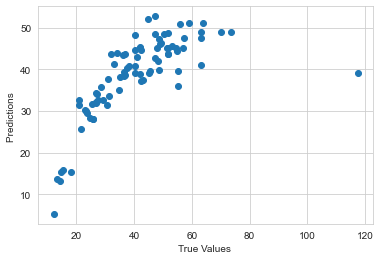

In [169]:
# Making the predictions
predictions = lm.predict(X_test)

# visual representations of predictions
plt.scatter(Y_test, predictions)  # not very good predictions!
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

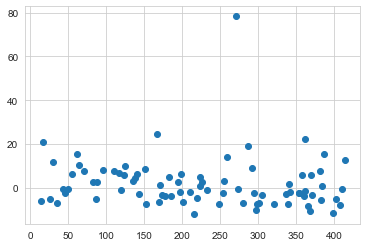

In [170]:
# plotting the differences btw actual and predictions

plt.plot(Y_test - predictions,marker='o',linestyle='')

In [171]:
test_predictions = lm.predict(X_test)
train_predictions = lm.predict(X_train)

print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")

print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)

Performance metrics for test set:

Mean absolute error is: 7.1697675286875455
Mean squared error is: 137.90303469021168
Root mean squared error is: 11.74321228157831
R-Square is: 0.48283167131082316


Performance metrics for training set:

Mean absolute error is: 5.896453283194478
Mean squared error is: 65.57632088488864
Root mean squared error is: 8.09792077541443
R-Square is: 0.5940717442253614


In [172]:
lm_results = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_predictions) , cross_val(LinearRegression())]], 
                          columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', "CV"])
lm_results

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Linear Regression,7.169768,137.903035,11.743212,0.482832,0.571316


## 3.Application of Random Forest Regression by scikit-learn

In [175]:
# Random Forest by scikit-learn
from sklearn.ensemble import RandomForestRegressor


In [176]:

random_forest = RandomForestRegressor(n_estimators=500)
random_forest.fit(X_train, Y_train)

test_predictions = random_forest.predict(X_test)
train_predictions = random_forest.predict(X_train)



print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")
print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)



random_forest_results = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_predictions), cross_val(RandomForestRegressor())]], 
                            columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', 'CV'])


random_forest_results

RandomForestRegressor(n_estimators=500)

Performance metrics for test set:

Mean absolute error is: 5.416981130669857
Mean squared error is: 110.58877039210529
Root mean squared error is: 10.516119550105223
R-Square is: 0.5852664904441311


Performance metrics for training set:

Mean absolute error is: 1.964465640805984
Mean squared error is: 7.608900996621247
Root mean squared error is: 2.7584236434277543
R-Square is: 0.9528996462710655


,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Random Forest Regressor,5.416981,110.58877,10.51612,0.585266,0.664156


In [177]:
# Performance metrics together

perf_metrics = lm_results.append(random_forest_results, ignore_index=True)
perf_metrics

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Linear Regression,7.169768,137.903035,11.743212,0.482832,0.571316
1,Random Forest Regressor,5.416981,110.588770,10.516120,0.585266,0.664156
